# Recommendations with IBM

In this notebook, you will be putting your recommendation skills to use on real data from the IBM Watson Studio platform. 


You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/rubrics/3325/view).  **Please save regularly.**

By following the table of contents, you will build out a number of different methods for making recommendations that can be used for different situations. 


## Table of Contents

I. [Exploratory Data Analysis](#Exploratory-Data-Analysis)<br>
II. [Rank Based Recommendations](#Rank)<br>
III. [User-User Based Collaborative Filtering](#User-User)<br>
IV. [Content Based Recommendations (EXTRA - NOT REQUIRED)](#Content-Recs)<br>
V. [Matrix Factorization](#Matrix-Fact)<br>
VI. [Extras & Concluding](#conclusions)

At the end of the notebook, you will find directions for how to submit your work.  Let's get started by importing the necessary libraries and reading in the data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

df = pd.read_csv('C:\\Anaconda3\\recommendation_system\\user-item-interactions.csv')
df_content = pd.read_csv('C:\\Anaconda3\\recommendation_system\\articles_community.csv')
del df['Unnamed: 0']
del df_content['Unnamed: 0']

# Show df to get an idea of the data
df.head()

,article_id,title,email
0,1430.0,"using pixiedust for fast, flexible, and easier...",ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7
1,1314.0,healthcare python streaming application demo,083cbdfa93c8444beaa4c5f5e0f5f9198e4f9e0b
2,1429.0,use deep learning for image classification,b96a4f2e92d8572034b1e9b28f9ac673765cd074
3,1338.0,ml optimization using cognitive assistant,06485706b34a5c9bf2a0ecdac41daf7e7654ceb7
4,1276.0,deploy your python model as a restful api,f01220c46fc92c6e6b161b1849de11faacd7ccb2


In [3]:
pd.options.display.max_colwidth = 250
# Show df_content to get an idea of the data
df_content.head()


,doc_body,doc_description,doc_full_name,doc_status,article_id
0,"Skip navigation Sign in SearchLoading...\r\n\r\nClose Yeah, keep it Undo CloseTHIS VIDEO IS UNAVAILABLE.\r\nWATCH QUEUE\r\nQUEUE\r\nWatch Queue Queue * Remove all\r\n * Disconnect\r\n\r\nThe next video is starting stop 1. Loading...\r\n\r\nWatch ...",Detect bad readings in real time using Python and Streaming Analytics.,Detect Malfunctioning IoT Sensors with Streaming Analytics,Live,0
1,"No Free Hunch Navigation * kaggle.com\r\n\r\n * kaggle.com\r\n\r\nCommunicating data science: A guide to presenting your work 4COMMUNICATING DATA SCIENCE: A GUIDE TO PRESENTING YOUR WORK\r\nMegan Risdal | 06.29.2016\r\n\r\nSee the forest, see the...","See the forest, see the trees. Here lies the challenge in both performing and presenting an analysis. As data scientists, analysts, and machine learning engineers faced with fulfilling business obj…",Communicating data science: A guide to presenting your work,Live,1
2,☰ * Login\r\n * Sign Up\r\n\r\n * Learning Paths\r\n * Courses * Our Courses\r\n * Partner Courses\r\n \r\n \r\n * Badges * Our Badges\r\n * BDU Badge Program\r\n \r\n \r\n * Watson Student Advisor\r\n\r\n * \r\n\r\nBLOG\r\nWelcome ...,Here’s this week’s news in Data Science and Big Data.,"This Week in Data Science (April 18, 2017)",Live,2
3,"DATALAYER: HIGH THROUGHPUT, LOW LATENCY AT SCALE - BOOST THE PERFORMANCE OF YOUR\r\nDISTRIBUTED DATABASE\r\nShare on Twitter Share on Facebook Share on Google+ Vote on Hacker News Published Dec 29, 2016Learn how distributed DBs (Cassandra, MongoD...","Learn how distributed DBs solve the problem of scaling persistent storage, but introduce latency as data size increases and become I/O bound.",DataLayer Conference: Boost the performance of your distributed database,Live,3
4,"Skip navigation Sign in SearchLoading...\r\n\r\nClose Yeah, keep it Undo CloseTHIS VIDEO IS UNAVAILABLE.\r\nWATCH QUEUE\r\nQUEUE\r\nWatch Queue Queue * Remove all\r\n * Disconnect\r\n\r\nThe next video is starting stop 1. Loading...\r\n\r\nWatch ...",This video demonstrates the power of IBM DataScience Experience using a simple New York State Restaurant Inspections data scenario.,Analyze NY Restaurant data using Spark in DSX,Live,4


In [6]:
df_content['doc_status'].value_counts()

doc_status
Live    1056
Name: count, dtype: int64

In [8]:
df_content['doc_status'].nunique()

1

In [10]:
df_content.shape

(1056, 5)

In [12]:
df.shape

(45993, 3)

### <a class="anchor" id="Exploratory-Data-Analysis">Part I : Exploratory Data Analysis</a>

Use the dictionary and cells below to provide some insight into the descriptive statistics of the data.

`1.` What is the distribution of how many articles a user interacts with in the dataset?  Provide a visual and descriptive statistics to assist with giving a look at the number of times each user interacts with an article.  

In [15]:
df.head()

,article_id,title,email
0,1430.0,"using pixiedust for fast, flexible, and easier data analysis and experimentation",ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7
1,1314.0,healthcare python streaming application demo,083cbdfa93c8444beaa4c5f5e0f5f9198e4f9e0b
2,1429.0,use deep learning for image classification,b96a4f2e92d8572034b1e9b28f9ac673765cd074
3,1338.0,ml optimization using cognitive assistant,06485706b34a5c9bf2a0ecdac41daf7e7654ceb7
4,1276.0,deploy your python model as a restful api,f01220c46fc92c6e6b161b1849de11faacd7ccb2


In [17]:
user_article_interactions = df.groupby('email')['article_id'].count()


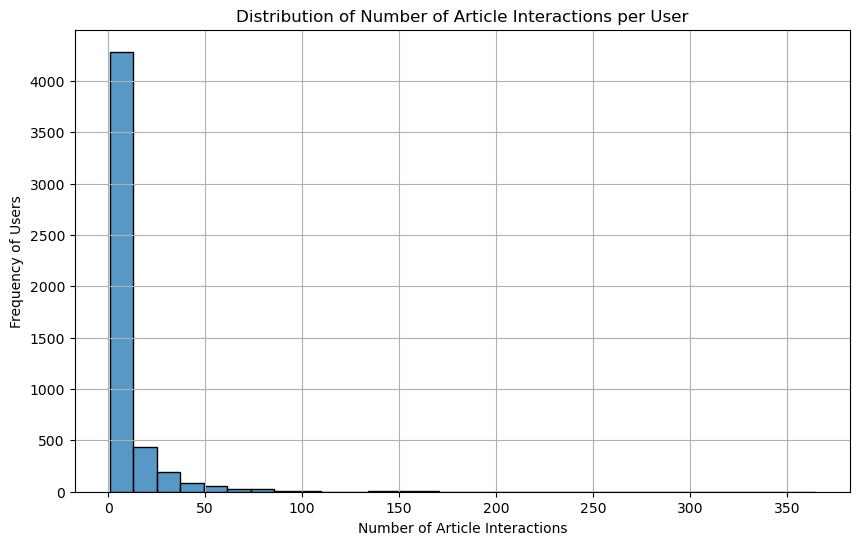

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of article interactions per user
plt.figure(figsize=(10, 6))

# Create a histogram of user interactions
sns.histplot(user_article_interactions, bins=30, kde=False)

# Customize the plot
plt.title('Distribution of Number of Article Interactions per User')
plt.xlabel('Number of Article Interactions')
plt.ylabel('Frequency of Users')
plt.grid(True)

plt.show()

In [20]:
# Fill in the median and maximum number of user_article interactios below
print(f"user article interstions median {user_article_interactions.median()}")
print(f"user article interactions maximum value {user_article_interactions.max()}")
# 50% of individuals interact with ____ number of articles or fewer.
# The maximum number of user-article interactions by any 1 user is ______.

user article interstions median 3.0
user article interactions maximum value 364


`2.` Explore and remove duplicate articles from the **df_content** dataframe.  

In [24]:
# Find and explore duplicate articles
df_content.duplicated().sum()

0

In [26]:
df_content[df_content['article_id'].duplicated()]

,doc_body,doc_description,doc_full_name,doc_status,article_id
365,"Follow Sign in / Sign up Home About Insight Data Science Data Engineering Health Data AI 5 * Share\r\n * 5\r\n * \r\n * \r\n\r\nNever miss a story from Insight Data , when you sign up for Medium. Learn more Never miss a story from Insight Data Ge...",During the seven-week Insight Data Engineering Fellows Program recent grads and experienced software engineers learn the latest open source technologies by building a data platform to handle large…,Graph-based machine learning,Live,50
692,"Homepage Follow Sign in / Sign up Homepage * Home\r\n * Data Science Experience\r\n * Data Catalog\r\n * \r\n * Watson Data Platform\r\n * \r\n\r\nSusanna Tai Blocked Unblock Follow Following Offering Manager, Watson Data Platform | Data Catalog ...","One of the earliest documented catalogs was compiled at the great library of Alexandria in the third century BC, to help scholars manage, understand and access its vast collection of literature…",How smart catalogs can turn the big data flood into an ocean of opportunity,Live,221
761,Homepage Follow Sign in Get started Homepage * Home\r\n * Data Science Experience\r\n * Data Catalog\r\n * IBM Data Refinery\r\n * \r\n * Watson Data Platform\r\n * \r\n\r\nSourav Mazumder Blocked Unblock Follow Following Nov 27\r\n--------------...,"Today’s world of data science leverages data from various sources. Commonly, these sources are Hadoop File System, Enterprise Data Warehouse, Relational Database systems, Enterprise file systems, etc…",Using Apache Spark as a parallel processing framework for accessing REST based data services,Live,398
970,This video shows you how to construct queries to access the primary index through the API.Visit http://www.cloudant.com/sign-up to sign up for a free Cloudant account.,This video shows you how to construct queries to access the primary index through the API,Use the Primary Index,Live,577
971,Homepage Follow Sign in Get started * Home\r\n * Data Science Experience\r\n * Data Catalog\r\n * IBM Data Refinery\r\n * \r\n * Watson Data Platform\r\n * \r\n\r\nCarmen Ruppach Blocked Unblock Follow Following Offering Manager for Data Refinery...,"If you are like most data scientists, you are probably spending a lot of time to cleanse, shape and prepare your data before you can actually start with the more enjoyable part of building and…",Self-service data preparation with IBM Data Refinery,Live,232


In [28]:
df_content[df_content['article_id']==50]

,doc_body,doc_description,doc_full_name,doc_status,article_id
50,"Follow Sign in / Sign up Home About Insight Data Science Data Engineering Health Data AI Never miss a story from Insight Data , when you sign up for Medium. Learn more Never miss a story from Insight Data Get updates Get updates Sebastien Dery Bl...",Community Detection at Scale,Graph-based machine learning,Live,50
365,"Follow Sign in / Sign up Home About Insight Data Science Data Engineering Health Data AI 5 * Share\r\n * 5\r\n * \r\n * \r\n\r\nNever miss a story from Insight Data , when you sign up for Medium. Learn more Never miss a story from Insight Data Ge...",During the seven-week Insight Data Engineering Fellows Program recent grads and experienced software engineers learn the latest open source technologies by building a data platform to handle large…,Graph-based machine learning,Live,50


In [30]:
# Remove any rows that have the same article_id - only keep the first
df_content=df_content.drop_duplicates(subset=['article_id'], keep='first')


In [32]:
df_content[df_content['article_id']==50]

,doc_body,doc_description,doc_full_name,doc_status,article_id
50,"Follow Sign in / Sign up Home About Insight Data Science Data Engineering Health Data AI Never miss a story from Insight Data , when you sign up for Medium. Learn more Never miss a story from Insight Data Get updates Get updates Sebastien Dery Bl...",Community Detection at Scale,Graph-based machine learning,Live,50


In [34]:
df[df['article_id']==9]

,article_id,title,email
1543,9.0,"3992 using apache spark to predict attack vectors a...\nName: title, dtype: object",a30342a74966e5ab9724e35cdd21922dd62027a9
25727,9.0,"3992 using apache spark to predict attack vectors a...\nName: title, dtype: object",df35805092d0322ed12feef3558b515d0311c690
26174,9.0,"3992 using apache spark to predict attack vectors a...\nName: title, dtype: object",31dcc3d2fa8aec069b369ee92d8a526bd1f26b80
28755,9.0,"3992 using apache spark to predict attack vectors a...\nName: title, dtype: object",14a9a6763eaab9103bb29bdcad4c6c8777981cc7
29748,9.0,"3992 using apache spark to predict attack vectors a...\nName: title, dtype: object",c10c55ea873ca4f39e779a2c4673ac8b801b85d8
30318,9.0,"3992 using apache spark to predict attack vectors a...\nName: title, dtype: object",e04510c72f3e96ac354b29eb5b7479fc555509ce
33790,9.0,"3992 using apache spark to predict attack vectors a...\nName: title, dtype: object",b1f493c95ba234d783e017bc0981cd99f7098d00
35263,9.0,"3992 using apache spark to predict attack vectors a...\nName: title, dtype: object",e4a3baee5dc356156ca48ff2fc1b97f8b3899bc4
38805,9.0,"3992 using apache spark to predict attack vectors a...\nName: title, dtype: object",e6d693a1c9251cea3b3b5543eebcb624925193d6
40269,9.0,"3992 using apache spark to predict attack vectors a...\nName: title, dtype: object",de28dbec92ca4c4ec24caf59576beb1beea1c49d


`3.` Use the cells below to find:

**a.** The number of unique articles that have an interaction with a user.  
**b.** The number of unique articles in the dataset (whether they have any interactions or not).<br>
**c.** The number of unique users in the dataset. (excluding null values) <br>
**d.** The number of user-article interactions in the dataset.

In [37]:
# The number of unique articles that have at least one interaction
unique_articles=df['article_id'].nunique()
# The number of unique articles on the IBM platform
total_articles=df_content.shape[0]
# The number of unique users
unique_users=df['email'].nunique()
# The number of user-article interactions
user_article_intersactions=df.shape[0]

`4.` Use the cells below to find the most viewed **article_id**, as well as how often it was viewed.  After talking to the company leaders, the `email_mapper` function was deemed a reasonable way to map users to ids.  There were a small number of null values, and it was found that all of these null values likely belonged to a single user (which is how they are stored using the function below).

In [40]:
most_viewed_articles=df.groupby('article_id')['email'].count().sort_values(ascending=False)

In [42]:
 # The most viewed article in the dataset as a string with one value following the decimal 
print(most_viewed_articles.index[0])
# The most viewed article in the dataset was viewed how many times?
print(most_viewed_articles.values[0])

1429.0
937


In [44]:
## No need to change the code here - this will be helpful for later parts of the notebook
# Run this cell to map the user email to a user_id column and remove the email column

def email_mapper():
    coded_dict = dict()
    cter = 1
    email_encoded = []
    
    for val in df['email']:
        if val not in coded_dict:
            coded_dict[val] = cter
            cter+=1
        
        email_encoded.append(coded_dict[val])
    return email_encoded

email_encoded = email_mapper()
del df['email']
df['user_id'] = email_encoded

# show header
df.head()

,article_id,title,user_id
0,1430.0,"using pixiedust for fast, flexible, and easier data analysis and experimentation",1
1,1314.0,healthcare python streaming application demo,2
2,1429.0,use deep learning for image classification,3
3,1338.0,ml optimization using cognitive assistant,4
4,1276.0,deploy your python model as a restful api,5


In [46]:
df_content.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1051 entries, 0 to 1055
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   doc_body         1037 non-null   object
 1   doc_description  1048 non-null   object
 2   doc_full_name    1051 non-null   object
 3   doc_status       1051 non-null   object
 4   article_id       1051 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 49.3+ KB


# <a class="anchor" id="Rank">Part II: Rank-Based Recommendations</a>

Unlike in the earlier lessons, we don't actually have ratings for whether a user liked an article or not.  We only know that a user has interacted with an article.  In these cases, the popularity of an article can really only be based on how often an article was interacted with.

`1.` Fill in the function below to return the **n** top articles ordered with most interactions as the top. Test your function using the tests below.

In [49]:
def get_top_articles(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article titles 
    
    '''
    # Group by article_id, count the interactions, sort them, and get top 'n' article ids
    top_articles_id=df.groupby('article_id')['user_id'].count().sort_values(ascending=False).head(n).index.to_list()  # output : [1429,1330,1431]
    top_articles=[]
    # Get the titles for the top article ids
    for article_id in top_articles_id:
        top_articles.append(np.array(df[df['article_id']==article_id]['title'].unique())[0])
    return top_articles_id,top_articles # Return the top article titles from df (not df_content)



In [51]:
top_5 = get_top_articles(5)[0]
print(top_5)

[1429.0, 1330.0, 1431.0, 1427.0, 1364.0]


### <a class="anchor" id="User-User">Part III: User-User Based Collaborative Filtering</a>


`1.` Use the function below to reformat the **df** dataframe to be shaped with users as the rows and articles as the columns.  

* Each **user** should only appear in each **row** once.


* Each **article** should only show up in one **column**.  


* **If a user has interacted with an article, then place a 1 where the user-row meets for that article-column**.  It does not matter how many times a user has interacted with the article, all entries where a user has interacted with an article should be a 1.  


* **If a user has not interacted with an item, then place a zero where the user-row meets for that article-column**. 

Use the tests to make sure the basic structure of your matrix matches what is expected by the solution.

In [54]:
# create the user-article matrix with 1's and 0's

def create_user_item_matrix(df):
    '''
    INPUT:
    df - pandas dataframe with article_id, title, user_id columns
    
    OUTPUT:
    user_item - user item matrix 
    
    Description:
    Return a matrix with user ids as rows and article ids on the columns with 1 values where a user interacted with 
    an article and a 0 otherwise
    '''
    user_item=df.groupby(['user_id','article_id']).max().unstack(fill_value=0).replace(to_replace=r'.*', value=1, regex=True)
    
    return user_item # return the user_item matrix 

user_item = create_user_item_matrix(df)

C:\Users\Moustafa Abdel-sttar\AppData\Local\Temp\ipykernel_7088\61778194.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  user_item=df.groupby(['user_id','article_id']).max().unstack(fill_value=0).replace(to_replace=r'.*', value=1, regex=True)


In [56]:
user_item

title                                                          \
article_id 0.0    2.0    4.0    8.0    9.0    12.0   14.0   15.0   16.0     
user_id                                                                     
1               0      0      0      0      0      0      0      0      0   
2               0      0      0      0      0      0      0      0      0   
3               0      0      0      0      0      1      0      0      0   
4               0      0      0      0      0      0      0      0      0   
5               0      0      0      0      0      0      0      0      0   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
5145            0      0      0      0      0      0      0      0      0   
5146            0      0      0      0      0      0      0      0      0   
5147            0      0      0      0      0      0      0      0      0   
5148            0      0      0      0      0      0      0      0      0   
5149            0      0      0      0      0      0      0      0      1   

                   ...                                                   \
article_id 18.0    ... 1434.0 1435.0 1436.0 1437.0 1439.0 1440.0 1441.0   
user_id            ...                                                    
1               0  ...      0      0      1      0      1      0      0   
2               0  ...      0      0      0      0      0      0      0   
3               0  ...      0      0      1      0      0      0      0   
4               0  ...      0      0      0      0      0      0      0   
5               0  ...      0      0      0      0      0      0      0   
...           ...  ...    ...    ...    ...    ...    ...    ...    ...   
5145            0  ...      0      0      0      0      0      0      0   
5146            0  ...      0      0      0      0      0      0      0   
5147            0  ...      0      0      0      0      0      0      0   
5148            0  ...      0      0      0      0      0      0      0   
5149            0  ...      0      0      0      0      0      0      0   

                                 
article_id 1442.0 1443.0 1444.0  
user_id                          
1               0      0      0  
2               0      0      0  
3               0      0      0  
4               0      0      0  
5               0      0      0  
...           ...    ...    ...  
5145            0      0      0  
5146            0      0      0  
5147            0      0      0  
5148            0      0      0  
5149            0      0      0  

[5149 rows x 714 columns]

In [58]:
## Tests: You should just need to run this cell.  Don't change the code.
assert user_item.shape[0] == 5149, "Oops!  The number of users in the user-article matrix doesn't look right."
assert user_item.shape[1] == 714, "Oops!  The number of articles in the user-article matrix doesn't look right."
assert user_item.sum(axis=1)[1] == 36, "Oops!  The number of articles seen by user 1 doesn't look right."
print("You have passed our quick tests!  Please proceed!")

You have passed our quick tests!  Please proceed!


`2.` Complete the function below which should take a user_id and provide an ordered list of the most similar users to that user (from most similar to least similar).  The returned result should not contain the provided user_id, as we know that each user is similar to him/herself. Because the results for each user here are binary, it (perhaps) makes sense to compute similarity as the dot product of two users. 

Use the tests to test your function.

In [61]:
def find_similar_users(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user_id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    similar_users - (list) an ordered list where the closest users (largest dot product users)
                    are listed first
    
    Description:
    Computes the similarity of every pair of users based on the dot product
    Returns an ordered
    
    '''
    user_vector = user_item.loc[user_id] # return : a Series of the given user_id
    dot_products = user_item.dot(user_vector)  # return : the dot product (similarity) between the given user_id and every other user
    most_similar_users=dot_products.sort_values(ascending=False).index.to_list() # return : a sorted list of users based on the magnitude of the dot product (how similar)
    # compute similarity of each user to the provided user
    # sort by similarity
    # create list of just the ids
   
    # remove the own user's id
    return most_similar_users # return a list of the users in order from most to least similar
        

In [63]:
# Do a spot check of your function
print("The 10 most similar users to user 1 are: {}".format(find_similar_users(1)[:10]))
print("The 5 most similar users to user 3933 are: {}".format(find_similar_users(3933)[:5]))
print("The 3 most similar users to user 46 are: {}".format(find_similar_users(46)[:3]))

The 10 most similar users to user 1 are: [1, 3933, 23, 3782, 203, 4459, 3870, 131, 4201, 46]
The 5 most similar users to user 3933 are: [1, 3933, 23, 3782, 203]
The 3 most similar users to user 46 are: [46, 4201, 3782]


`3.` Now that you have a function that provides the most similar users to each user, you will want to use these users to find articles you can recommend.  Complete the functions below to return the articles you would recommend to each user. 

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45993 entries, 0 to 45992
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   article_id  45993 non-null  float64
 1   title       45993 non-null  object 
 2   user_id     45993 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ MB


In [68]:
df['article_id']=df['article_id'].astype(str)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45993 entries, 0 to 45992
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   article_id  45993 non-null  object
 1   title       45993 non-null  object
 2   user_id     45993 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [72]:
def get_article_names(article_ids, df=df):
    '''
    INPUT:
    article_ids - (list) a list of article ids
    df - (pandas dataframe) df as defined at the top of the notebook
    
    OUTPUT:
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the title column)
    '''
    # Your code here
    article_names=[]
    article_names = df[df['article_id'].isin(article_ids)].sort_values(by='article_id').groupby('article_id')['title'].first().tolist() # takes an article_ids of int or floats
    return article_names# Return the article names associated with list of article ids


def get_user_articles(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    article_ids - (list) a list of the article ids seen by the user
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the doc_full_name column in df_content)
    
    Description:
    Provides a list of the article_ids and article titles that have been seen by a user
    '''
    # Your code here
    user_vector = user_item.loc[user_id] # return : a Series for the given user_id
    article_set = user_vector[user_vector == 1].index.tolist() # return: read articles for the given user_id [('title', 43.0),('title', 109.0)]
    article_ids = [value for _, value in article_set]    # return : read articles ids without the title word [43.0,109.0]
    article_ids_str=list(map(str,article_ids)) # return: ['43.0','109.0']
    article_names = get_article_names(article_ids_str) #return: ['access db2 warehouse on cloud and db2 with python',tensorflow quick tips']

    return article_ids_str, article_names # return the ids and names


def user_user_recs(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds articles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    Users who are the same closeness are chosen arbitrarily as the 'next' user
    
    For the user where the number of recommended articles starts below m 
    and ends exceeding m, the last items are chosen arbitrarily
    
    
    '''
    # Your code here
    articles_read = get_user_articles(user_id)[0] #return: a list of the articles ids for the given user_id AS Strings
    closest_neighbors = find_similar_users(user_id)#return: a list of the users ids for the given user_id AS integrs 
    recs = np.array([])
    for neighbor in closest_neighbors:
        neigh_likes = get_user_articles(neighbor)[0]
        new_recs = np.setdiff1d(neigh_likes, articles_read, assume_unique=True)#return: a list of articles that the neighbor has liked but the user hasn't read yet
        recs = np.unique(np.concatenate([new_recs, recs], axis=0))
        
        
        if len(recs) >= m:
            break

    
    recommendations = get_article_names(recs[:m])
    return recommendations
    
    #return recs # return your recommendations for this user_id    

In [74]:
get_article_names(['18.0',
 '20.0',
 '29.0',
 '43.0',
 '50.0',
 '62.0'])

['the greatest public datasets for ai – startup grind',
 'working interactively with rstudio and notebooks in dsx',
 'experience iot with coursera',
 'deep learning with tensorflow course by big data university',
 'graph-based machine learning',
 'data visualization: the importance of excluding unnecessary details']

In [76]:
get_user_articles(1)

(['43.0',
  '109.0',
  '151.0',
  '268.0',
  '310.0',
  '329.0',
  '346.0',
  '390.0',
  '494.0',
  '525.0',
  '585.0',
  '626.0',
  '668.0',
  '732.0',
  '768.0',
  '910.0',
  '968.0',
  '981.0',
  '1052.0',
  '1170.0',
  '1183.0',
  '1185.0',
  '1232.0',
  '1293.0',
  '1305.0',
  '1363.0',
  '1368.0',
  '1391.0',
  '1400.0',
  '1406.0',
  '1427.0',
  '1429.0',
  '1430.0',
  '1431.0',
  '1436.0',
  '1439.0'],
 ['access db2 warehouse on cloud and db2 with python',
  'tensorflow quick tips',
  'apache spark lab, part 1: basic concepts',
  'categorize urban density',
  'classify tumors with machine learning',
  'country statistics: life expectancy at birth',
  'finding optimal locations of new store using decision optimization',
  'gosales transactions for naive bayes model',
  'predict loan applicant behavior with tensorflow neural networking',
  'putting a human face on machine learning',
  'sudoku',
  'uci ml repository: chronic kidney disease data set',
  'uci: iris',
  'use xgboost,

In [78]:
user_user_recs(user_id=29)

['using deep learning to reconstruct high-resolution audio',
 'access postgresql with r',
 'adolescent fertility rate (births per 1,000 women ages 15-19), worldwide',
 'analyze energy consumption in buildings',
 'analyze open data sets with spark & pixiedust',
 'analyze open data sets with pandas dataframes',
 'apache spark lab, part 1: basic concepts',
 'apache spark lab, part 3: machine learning',
 'classify tumors with machine learning',
 'country statistics: stock of broad money']

In [80]:
#count=0
#recs = np.array([])
#for neighbor in closest_5_neigh:
    #print(neighbor)
    #neigh_likes = get_user_articles(neighbor)[0]
    #print(neigh_likes)
    #new_recs = np.setdiff1d(neigh_likes, articles_read, assume_unique=True)
    #recs = np.unique(np.concatenate([new_recs, recs], axis=0))
    #print(new_recs)
#print(recs)

In [82]:
# Test your functions here - No need to change this code - just run this cell
assert set(get_article_names(['1024.0', '1176.0', '1305.0', '1314.0', '1422.0', '1427.0'])) == set(['using deep learning to reconstruct high-resolution audio', 'build a python app on the streaming analytics service', 'gosales transactions for naive bayes model', 'healthcare python streaming application demo', 'use r dataframes & ibm watson natural language understanding', 'use xgboost, scikit-learn & ibm watson machine learning apis']), "Oops! Your the get_article_names function doesn't work quite how we expect."
assert set(get_article_names(['1320.0', '232.0', '844.0'])) == set(['housing (2015): united states demographic measures','self-service data preparation with ibm data refinery','use the cloudant-spark connector in python notebook']), "Oops! Your the get_article_names function doesn't work quite how we expect."
assert set(get_user_articles(20)[0]) == set(['1320.0', '232.0', '844.0'])
assert set(get_user_articles(20)[1]) == set(['housing (2015): united states demographic measures', 'self-service data preparation with ibm data refinery','use the cloudant-spark connector in python notebook'])
assert set(get_user_articles(2)[0]) == set(['1024.0', '1176.0', '1305.0', '1314.0', '1422.0', '1427.0'])
assert set(get_user_articles(2)[1]) == set(['using deep learning to reconstruct high-resolution audio', 'build a python app on the streaming analytics service', 'gosales transactions for naive bayes model', 'healthcare python streaming application demo', 'use r dataframes & ibm watson natural language understanding', 'use xgboost, scikit-learn & ibm watson machine learning apis'])
print("If this is all you see, you passed all of our tests!  Nice job!")

If this is all you see, you passed all of our tests!  Nice job!


`4.` Now we are going to improve the consistency of the **user_user_recs** function from above.  

* Instead of arbitrarily choosing when we obtain users who are all the same closeness to a given user - choose the users that have the most total article interactions before choosing those with fewer article interactions.


* Instead of arbitrarily choosing articles from the user where the number of recommended articles starts below m and ends exceeding m, choose articles with the articles with the most total interactions before choosing those with fewer total interactions. This ranking should be  what would be obtained from the **top_articles** function you wrote earlier.

In [85]:
def get_top_sorted_users(user_id, df=df, user_item=user_item):
    '''
    INPUT:
    user_id - (int)
    df - (pandas dataframe) df as defined at the top of the notebook 
    user_item - (pandas dataframe) matrix of users by articles: 
            1's when a user has interacted with an article, 0 otherwise
    
            
    OUTPUT:
    neighbors_df - (pandas dataframe) a dataframe with:
                    neighbor_id - is a neighbor user_id
                    similarity - measure of the similarity of each user to the provided user_id
                    num_interactions - the number of articles viewed by the user - if a u
                    
    Other Details - sort the neighbors_df by the similarity and then by number of interactions where 
                    highest of each is higher in the dataframe
     
    '''
    # Your code here
    user_vector = user_item.loc[user_id]
    dot_products = user_item.dot(user_vector)

# Get article counts for each user
    article_counts = {}
    for user in dot_products.index:
        article_ids, _ = get_user_articles(user)  # Assuming this returns both ids and names
        article_counts[user] = len(article_ids)
    neighbors_df = pd.DataFrame({
    'neighbor_id': dot_products.index,
    'similarity': dot_products.values,
    'num_interactions': [article_counts[user] for user in dot_products.index]})
    neighbors_df= neighbors_df.sort_values(by=['similarity', 'num_interactions'], ascending=[False, False]).set_index('neighbor_id')

    return neighbors_df # Return the dataframe specified in the doc_string


def user_user_recs_part2(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user by article id
    rec_names - (list) a list of recommendations for the user by article title
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds articles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    * Choose the users that have the most total article interactions 
    before choosing those with fewer article interactions.

    * Choose articles with the articles with the most total interactions 
    before choosing those with fewer total interactions. 
   
    '''
    # Your code here
    articles_read = get_user_articles(user_id)[0]
    well_sorted_neighbors=get_top_sorted_users(user_id).index.tolist()
    recs = np.array([])
    for neighbor in well_sorted_neighbors:
        neigh_likes = get_user_articles(neighbor)[0]
        new_recs = np.setdiff1d(neigh_likes, articles_read, assume_unique=True)
        recs = np.unique(np.concatenate([new_recs, recs], axis=0))
        if len(recs) >= m:
            break
    

    
    rec_names = get_article_names(recs[:m])



    
    return recs[:m], rec_names


In [87]:
find_similar_users(2)[:10]

[2, 49, 3764, 98, 3697, 3782, 38, 21, 23, 5083]

In [89]:
get_top_sorted_users(2).head(10)

,similarity,num_interactions
neighbor_id,,
2,6,6
49,5,101
3697,5,100
98,5,97
3764,5,97
23,4,135
3782,4,135
4785,4,62
21,4,61


In [90]:
user_user_recs(2)

['mapping points with folium',
 'a comparison of logistic regression and naive bayes ',
 'access mysql with python',
 'tidy up your jupyter notebooks with scripts',
 'analyze accident reports on amazon emr spark',
 'analyze energy consumption in buildings',
 'analyze open data sets with spark & pixiedust',
 'analyze open data sets with pandas dataframes',
 'analyze precipitation data',
 'analyzing data by using the sparkling.data library features']

In [91]:
user_user_recs_part2(2)[1]

['mapping points with folium',
 'a comparison of logistic regression and naive bayes ',
 'access mysql with python',
 'tidy up your jupyter notebooks with scripts',
 'analyze accident reports on amazon emr spark',
 'analyze energy consumption in buildings',
 'analyze open data sets with spark & pixiedust',
 'analyze open data sets with pandas dataframes',
 'analyze precipitation data',
 'analyzing data by using the sparkling.data library features']

In [95]:
# Quick spot check - don't change this code - just use it to test your functions
rec_ids, rec_names = user_user_recs_part2(20, 10)
print("The top 10 recommendations for user 20 are the following article ids:")
print(rec_ids)
print()
print("The top 10 recommendations for user 20 are the following article names:")
print(rec_names)

The top 10 recommendations for user 20 are the following article ids:
['1014.0' '1059.0' '109.0' '111.0' '1157.0' '1162.0' '1164.0' '1172.0'
 '1186.0' '12.0']

The top 10 recommendations for user 20 are the following article names:
['1448    i ranked every intro to data science course on...\nName: title, dtype: object', 'airbnb data for analytics: amsterdam calendar', 'tensorflow quick tips', 'tidy up your jupyter notebooks with scripts', 'airbnb data for analytics: washington d.c. listings', 'analyze energy consumption in buildings', 'analyze open data sets with pandas dataframes', 'apache spark lab, part 3: machine learning', 'connect to db2 warehouse on cloud and db2 using scala', 'timeseries data analysis of iot events by using jupyter notebook']


`5.` Use your functions from above to correctly fill in the solutions to the dictionary below.  Then test your dictionary against the solution.  Provide the code you need to answer each following the comments below.

In [97]:
neighbors_df = get_top_sorted_users(1)

In [98]:
neighbors_df_2 = get_top_sorted_users(131)

In [99]:
### Tests with a dictionary of results
user1_most_sim =user1_most_sim = neighbors_df[neighbors_df.index != 1].iloc[0].name # Find the user that is most similar to user 1 
user131_10th_sim = neighbors_df_2[neighbors_df.index != 1].iloc[10].name# Find the 10th most similar user to user 131

In [100]:
## Dictionary Test Here
sol_5_dict = {
    'The user that is most similar to user 1.': 3933, 
    'The user that is the 10th most similar to user 131': 242,
}

#t.sol_5_test(sol_5_dict)

`6.` If we were given a new user, which of the above functions would you be able to use to make recommendations?  Explain.  Can you think of a better way we might make recommendations?  Use the cell below to explain a better method for new users.

Rank-Based Recommendation for New Users: Since collaborative filtering relies on interaction history, we can recommend popular articles to new users based on overall article interaction counts (e.g., most viewed or liked articles). This ensures recommendations without needing user-specific data.

Content-Based or Hybrid Approach: Alternatively, we could use content-based filtering, recommending articles based on the user's preferences or interests. A hybrid method could combine both popular articles and user-specific content preferences, gradually incorporating collaborative filtering as the user interacts more.

`7.` Using your existing functions, provide the top 10 recommended articles you would provide for the a new user below.  You can test your function against our thoughts to make sure we are all on the same page with how we might make a recommendation.

In [109]:
new_user = '0.0'

# What would your recommendations be for this new user '0.0'?  As a new user, they have no observed articles.
# Provide a list of the top 10 article ids you would give to 
new_user_recs= set(get_top_articles(10)[0])# Your recommendations here
new_user_recs

{'1162.0',
 '1170.0',
 '1293.0',
 '1304.0',
 '1314.0',
 '1330.0',
 '1364.0',
 '1427.0',
 '1429.0',
 '1431.0'}

In [111]:
assert set(new_user_recs) == set(['1314.0','1429.0','1293.0','1427.0','1162.0','1364.0','1304.0','1170.0','1431.0','1330.0']), "Oops!  It makes sense that in this case we would want to recommend the most popular articles, because we don't know anything about these users."

print("That's right!  Nice job!")

That's right!  Nice job!


### <a class="anchor" id="Content-Recs">Part IV: Content Based Recommendations (EXTRA - NOT REQUIRED)</a>

Another method we might use to make recommendations is to perform a ranking of the highest ranked articles associated with some term.  You might consider content to be the **doc_body**, **doc_description**, or **doc_full_name**.  There isn't one way to create a content based recommendation, especially considering that each of these columns hold content related information.  

`1.` Use the function body below to create a content based recommender.  Since there isn't one right answer for this recommendation tactic, no test functions are provided.  Feel free to change the function inputs if you decide you want to try a method that requires more input values.  The input values are currently set with one idea in mind that you may use to make content based recommendations.  One additional idea is that you might want to choose the most popular recommendations that meet your 'content criteria', but again, there is a lot of flexibility in how you might make these recommendations.

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

In [114]:
df_content['combined_content'] = df_content['doc_description'] + " " + df_content['doc_full_name']


In [116]:
df_content.head(20)

,doc_body,doc_description,doc_full_name,doc_status,article_id,combined_content
0,"Skip navigation Sign in SearchLoading...\r\n\r\nClose Yeah, keep it Undo CloseTHIS VIDEO IS UNAVAILABLE.\r\nWATCH QUEUE\r\nQUEUE\r\nWatch Queue Queue * Remove all\r\n * Disconnect\r\n\r\nThe next video is starting stop 1. Loading...\r\n\r\nWatch ...",Detect bad readings in real time using Python and Streaming Analytics.,Detect Malfunctioning IoT Sensors with Streaming Analytics,Live,0,Detect bad readings in real time using Python and Streaming Analytics. Detect Malfunctioning IoT Sensors with Streaming Analytics
1,"No Free Hunch Navigation * kaggle.com\r\n\r\n * kaggle.com\r\n\r\nCommunicating data science: A guide to presenting your work 4COMMUNICATING DATA SCIENCE: A GUIDE TO PRESENTING YOUR WORK\r\nMegan Risdal | 06.29.2016\r\n\r\nSee the forest, see the...","See the forest, see the trees. Here lies the challenge in both performing and presenting an analysis. As data scientists, analysts, and machine learning engineers faced with fulfilling business obj…",Communicating data science: A guide to presenting your work,Live,1,"See the forest, see the trees. Here lies the challenge in both performing and presenting an analysis. As data scientists, analysts, and machine learning engineers faced with fulfilling business obj… Communicating data science: A guide to presenti..."
2,☰ * Login\r\n * Sign Up\r\n\r\n * Learning Paths\r\n * Courses * Our Courses\r\n * Partner Courses\r\n \r\n \r\n * Badges * Our Badges\r\n * BDU Badge Program\r\n \r\n \r\n * Watson Student Advisor\r\n\r\n * \r\n\r\nBLOG\r\nWelcome ...,Here’s this week’s news in Data Science and Big Data.,"This Week in Data Science (April 18, 2017)",Live,2,"Here’s this week’s news in Data Science and Big Data. This Week in Data Science (April 18, 2017)"
3,"DATALAYER: HIGH THROUGHPUT, LOW LATENCY AT SCALE - BOOST THE PERFORMANCE OF YOUR\r\nDISTRIBUTED DATABASE\r\nShare on Twitter Share on Facebook Share on Google+ Vote on Hacker News Published Dec 29, 2016Learn how distributed DBs (Cassandra, MongoD...","Learn how distributed DBs solve the problem of scaling persistent storage, but introduce latency as data size increases and become I/O bound.",DataLayer Conference: Boost the performance of your distributed database,Live,3,"Learn how distributed DBs solve the problem of scaling persistent storage, but introduce latency as data size increases and become I/O bound. DataLayer Conference: Boost the performance of your distributed database"
4,"Skip navigation Sign in SearchLoading...\r\n\r\nClose Yeah, keep it Undo CloseTHIS VIDEO IS UNAVAILABLE.\r\nWATCH QUEUE\r\nQUEUE\r\nWatch Queue Queue * Remove all\r\n * Disconnect\r\n\r\nThe next video is starting stop 1. Loading...\r\n\r\nWatch ...",This video demonstrates the power of IBM DataScience Experience using a simple New York State Restaurant Inspections data scenario.,Analyze NY Restaurant data using Spark in DSX,Live,4,This video demonstrates the power of IBM DataScience Experience using a simple New York State Restaurant Inspections data scenario. Analyze NY Restaurant data using Spark in DSX
5,"Compose is all about immediacy. You want a new database - you can have it in seconds. You want your database metrics - they're just a click away in your dashboard. And, for MongoDB and Redis, we've also provided immediate access to the database t...",Using Compose's PostgreSQL data browser.,Browsing PostgreSQL Data with Compose,Live,5,Using Compose's PostgreSQL data browser. Browsing PostgreSQL Data with Compose
6,"UPGRADING YOUR POSTGRESQL TO 9.5Share on Twitter Share on Facebook Share on Google+ Vote on Hacker News Published Apr 26, 2016Upgrading your PostgreSQL deployment to version 9.5 is now possible through theCompose console. Working out how to perfo...",Upgrading your PostgreSQL deployment to version 9.5 is now possible through the Compose console. Working out how to perform this upgrade safely and reliably has been an interesting process because f

In [118]:
df_content.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1051 entries, 0 to 1055
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   doc_body          1037 non-null   object
 1   doc_description   1048 non-null   object
 2   doc_full_name     1051 non-null   object
 3   doc_status        1051 non-null   object
 4   article_id        1051 non-null   int64 
 5   combined_content  1048 non-null   object
dtypes: int64(1), object(5)
memory usage: 57.5+ KB


In [120]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel

In [121]:
def tokenize(text):
   
    if not isinstance(text, str):  # Check if the input is a string
        return ''  # Return an empty string for non-string values
    text=text.lower()
    text=re.sub(r'[^a-zA-Z]'," ",text)
    
    #tokenize text
    tokens=word_tokenize(text)
    
    # Removing stop words
    tokens = [t for t in tokens if t not in stopwords.words("english")]
    
    #Lemmitizer then stemming
    """" Here I used stemming as it gave better results by inspecting we can try to change it after the model
    and see if there's a difference """
    #tokens=[WordNetLemmatizer().lemmatize(t) for t in tokens]
    tokens=[PorterStemmer().stem(t) for t in tokens]
    
    return ' '.join(tokens)  # Join tokens back into a single string for vectorization

In [124]:
df_content['combined_content'] = df_content['combined_content'].apply(tokenize)

In [126]:
df_content.head(20)

,doc_body,doc_description,doc_full_name,doc_status,article_id,combined_content
0,"Skip navigation Sign in SearchLoading...\r\n\r\nClose Yeah, keep it Undo CloseTHIS VIDEO IS UNAVAILABLE.\r\nWATCH QUEUE\r\nQUEUE\r\nWatch Queue Queue * Remove all\r\n * Disconnect\r\n\r\nThe next video is starting stop 1. Loading...\r\n\r\nWatch ...",Detect bad readings in real time using Python and Streaming Analytics.,Detect Malfunctioning IoT Sensors with Streaming Analytics,Live,0,detect bad read real time use python stream analyt detect malfunct iot sensor stream analyt
1,"No Free Hunch Navigation * kaggle.com\r\n\r\n * kaggle.com\r\n\r\nCommunicating data science: A guide to presenting your work 4COMMUNICATING DATA SCIENCE: A GUIDE TO PRESENTING YOUR WORK\r\nMegan Risdal | 06.29.2016\r\n\r\nSee the forest, see the...","See the forest, see the trees. Here lies the challenge in both performing and presenting an analysis. As data scientists, analysts, and machine learning engineers faced with fulfilling business obj…",Communicating data science: A guide to presenting your work,Live,1,see forest see tree lie challeng perform present analysi data scientist analyst machin learn engin face fulfil busi obj commun data scienc guid present work
2,☰ * Login\r\n * Sign Up\r\n\r\n * Learning Paths\r\n * Courses * Our Courses\r\n * Partner Courses\r\n \r\n \r\n * Badges * Our Badges\r\n * BDU Badge Program\r\n \r\n \r\n * Watson Student Advisor\r\n\r\n * \r\n\r\nBLOG\r\nWelcome ...,Here’s this week’s news in Data Science and Big Data.,"This Week in Data Science (April 18, 2017)",Live,2,week news data scienc big data week data scienc april
3,"DATALAYER: HIGH THROUGHPUT, LOW LATENCY AT SCALE - BOOST THE PERFORMANCE OF YOUR\r\nDISTRIBUTED DATABASE\r\nShare on Twitter Share on Facebook Share on Google+ Vote on Hacker News Published Dec 29, 2016Learn how distributed DBs (Cassandra, MongoD...","Learn how distributed DBs solve the problem of scaling persistent storage, but introduce latency as data size increases and become I/O bound.",DataLayer Conference: Boost the performance of your distributed database,Live,3,learn distribut db solv problem scale persist storag introduc latenc data size increas becom bound datalay confer boost perform distribut databas
4,"Skip navigation Sign in SearchLoading...\r\n\r\nClose Yeah, keep it Undo CloseTHIS VIDEO IS UNAVAILABLE.\r\nWATCH QUEUE\r\nQUEUE\r\nWatch Queue Queue * Remove all\r\n * Disconnect\r\n\r\nThe next video is starting stop 1. Loading...\r\n\r\nWatch ...",This video demonstrates the power of IBM DataScience Experience using a simple New York State Restaurant Inspections data scenario.,Analyze NY Restaurant data using Spark in DSX,Live,4,video demonstr power ibm datasci experi use simpl new york state restaur inspect data scenario analyz ny restaur data use spark dsx
5,"Compose is all about immediacy. You want a new database - you can have it in seconds. You want your database metrics - they're just a click away in your dashboard. And, for MongoDB and Redis, we've also provided immediate access to the database t...",Using Compose's PostgreSQL data browser.,Browsing PostgreSQL Data with Compose,Live,5,use compos postgresql data browser brows postgresql data compos
6,"UPGRADING YOUR POSTGRESQL TO 9.5Share on Twitter Share on Facebook Share on Google+ Vote on Hacker News Published Apr 26, 2016Upgrading your PostgreSQL deployment to version 9.5 is now possible through theCompose console. Working out how to perfo...",Upgrading your PostgreSQL deployment to version 9.5 is now possible through the Compose console. Working out how to perform this upgrade safely and reliably has been an interesting process because from version 9.4 to 9.5 is a PostgreSQL major upg...,Upgrading your PostgreSQL to 9.5,Live,6,upgrad postgresql deploy version possibl compos consol work perform upgrad safe reliabl interest process version postgresql major upgrad upgrad postgresql
7,"Follow Sign in / Sign up 135 8 * Share\r\n * 135\r\n * \r\n 

In [128]:
tfidf=TfidfVectorizer(stop_words='english')
tfidf_matrix=tfidf.fit_transform(df_content['combined_content'])

In [130]:
tfidf_matrix

<1051x2987 sparse matrix of type '<class 'numpy.float64'>'
	with 16988 stored elements in Compressed Sparse Row format>

In [132]:
cosine_sim=linear_kernel(tfidf_matrix,tfidf_matrix)
cosine_sim.shape

(1051, 1051)

In [134]:
df_content

,doc_body,doc_description,doc_full_name,doc_status,article_id,combined_content
0,"Skip navigation Sign in SearchLoading...\r\n\r\nClose Yeah, keep it Undo CloseTHIS VIDEO IS UNAVAILABLE.\r\nWATCH QUEUE\r\nQUEUE\r\nWatch Queue Queue * Remove all\r\n * Disconnect\r\n\r\nThe next video is starting stop 1. Loading...\r\n\r\nWatch ...",Detect bad readings in real time using Python and Streaming Analytics.,Detect Malfunctioning IoT Sensors with Streaming Analytics,Live,0,detect bad read real time use python stream analyt detect malfunct iot sensor stream analyt
1,"No Free Hunch Navigation * kaggle.com\r\n\r\n * kaggle.com\r\n\r\nCommunicating data science: A guide to presenting your work 4COMMUNICATING DATA SCIENCE: A GUIDE TO PRESENTING YOUR WORK\r\nMegan Risdal | 06.29.2016\r\n\r\nSee the forest, see the...","See the forest, see the trees. Here lies the challenge in both performing and presenting an analysis. As data scientists, analysts, and machine learning engineers faced with fulfilling business obj…",Communicating data science: A guide to presenting your work,Live,1,see forest see tree lie challeng perform present analysi data scientist analyst machin learn engin face fulfil busi obj commun data scienc guid present work
2,☰ * Login\r\n * Sign Up\r\n\r\n * Learning Paths\r\n * Courses * Our Courses\r\n * Partner Courses\r\n \r\n \r\n * Badges * Our Badges\r\n * BDU Badge Program\r\n \r\n \r\n * Watson Student Advisor\r\n\r\n * \r\n\r\nBLOG\r\nWelcome ...,Here’s this week’s news in Data Science and Big Data.,"This Week in Data Science (April 18, 2017)",Live,2,week news data scienc big data week data scienc april
3,"DATALAYER: HIGH THROUGHPUT, LOW LATENCY AT SCALE - BOOST THE PERFORMANCE OF YOUR\r\nDISTRIBUTED DATABASE\r\nShare on Twitter Share on Facebook Share on Google+ Vote on Hacker News Published Dec 29, 2016Learn how distributed DBs (Cassandra, MongoD...","Learn how distributed DBs solve the problem of scaling persistent storage, but introduce latency as data size increases and become I/O bound.",DataLayer Conference: Boost the performance of your distributed database,Live,3,learn distribut db solv problem scale persist storag introduc latenc data size increas becom bound datalay confer boost perform distribut databas
4,"Skip navigation Sign in SearchLoading...\r\n\r\nClose Yeah, keep it Undo CloseTHIS VIDEO IS UNAVAILABLE.\r\nWATCH QUEUE\r\nQUEUE\r\nWatch Queue Queue * Remove all\r\n * Disconnect\r\n\r\nThe next video is starting stop 1. Loading...\r\n\r\nWatch ...",This video demonstrates the power of IBM DataScience Experience using a simple New York State Restaurant Inspections data scenario.,Analyze NY Restaurant data using Spark in DSX,Live,4,video demonstr power ibm datasci experi use simpl new york state restaur inspect data scenario analyz ny restaur data use spark dsx
...,...,...,...,...,...,...
1051,PouchDB-find is a new API and syntax that allows for a simpler way to query PouchDB. It is much more suited to ad-hoc querying and a fair amount easier to learn than PouchDB’s current way of querying documents via Map/Reduce. It is a MongoDB-insp...,PouchDB uses MapReduce as its default search mechanism but that's about to change. Garren Smith gives an insight into how PouchDB's find plugin works and its relationship to the Cloudant Query search technology that uses a MongoDB-style query lan...,A look under the covers of PouchDB-find,Live,1046,pouchdb use mapreduc default search mechan chang garren smith give insight pouchdb find plugin work relationship cloudant queri search technolog use mongodb style queri languag look cover pouchdb find
1052,"We compare discriminative and generative learning as typified by logistic regression and naive Bayes. We show, contrary to a widely-held belief that discriminative classifiers are almost always to be preferred, that there can often be two distinc...","We compare discriminative and generative learning as typified by logistic regression and naive Bayes. We show, contrary to a

In [140]:
len(sorted(df['article_id'].unique().tolist()))

714

In [138]:
len(sorted(df_content['article_id'].unique().tolist()))

1051

## Many missing values to accout for a mapping between df and df_content to reccomend using content based

In [561]:
def content_based_recommendations(user_id, cosine_sim=cosine_sim, df_content=df_content, num_recommendations=10):
    """
    INPUT:
    user_articles_indices - (list) list of article indices the user has interacted with
    cosine_sim - (array) the cosine similarity matrix
    df_content - (DataFrame) the content dataframe containing article_id
    num_recommendations - (int) the number of recommendations to return

    OUTPUT:
    recommendations - (list) article_ids recommended based on content similarity
    """
    # Get the indices of articles the user has read
    user_article_indices = get_user_articles(user_id)[0]
    user_articles_indices_int = [int(float(id)) for id in user_articles_indices]
    user_article_indices_int=[1,2,3]
    # Initialize a series to hold similarity scores
    scores = np.zeros(cosine_sim.shape[0])

    # Aggregate similarity scores for the user's articles
    for idx in user_article_indices_int:
        scores += cosine_sim_list[idx]

    # Create a DataFrame to hold article IDs and their corresponding scores
    article_scores = pd.DataFrame({
        'article_id': df_content['article_id'],
        'similarity_score': scores
    })

    # Remove articles the user has already read
    article_scores = article_scores[~article_scores['article_id'].isin(df_content['article_id'][user_article_indices_int])]

    # Sort articles by similarity score
    recommendations = article_scores.sort_values(by='similarity_score', ascending=False)

    # Return the top recommendations
    return recommendations.head(num_recommendations)['article_id'].tolist()


In [563]:
content_based_recommendations(1)

[448, 559, 348, 78, 76, 491, 288, 440, 836, 210]

In [419]:
user_article_vectors = tfidf_matrix[user_article_indices]
user_article_vectors

<0x2993 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [ ]:
cosine_sim = cosine_similarity(user_article_vectors, tfidf_matrix)

`2.` Now that you have put together your content-based recommendation system, use the cell below to write a summary explaining how your content based recommender works.  Do you see any possible improvements that could be made to your function?  Is there anything novel about your content based recommender?

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

**Write an explanation of your content based recommendation system here.**

`3.` Use your content-recommendation system to make recommendations for the below scenarios based on the comments.  Again no tests are provided here, because there isn't one right answer that could be used to find these content based recommendations.

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

In [ ]:
# make recommendations for a brand new user


# make a recommendations for a user who only has interacted with article id '1427.0'



### <a class="anchor" id="Matrix-Fact">Part V: Matrix Factorization</a>

In this part of the notebook, you will build use matrix factorization to make article recommendations to the users on the IBM Watson Studio platform.

`1.` You should have already created a **user_item** matrix above in **question 1** of **Part III** above.  This first question here will just require that you run the cells to get things set up for the rest of **Part V** of the notebook. 

In [86]:
# Load the matrix here
#user_item_matrix = pd.read_pickle('user_item.p')
user_item_matrix=user_item

In [88]:
# quick look at the matrix
user_item_matrix.head()

title                                                          \
article_id 0.0    2.0    4.0    8.0    9.0    12.0   14.0   15.0   16.0     
user_id                                                                     
1               0      0      0      0      0      0      0      0      0   
2               0      0      0      0      0      0      0      0      0   
3               0      0      0      0      0      1      0      0      0   
4               0      0      0      0      0      0      0      0      0   
5               0      0      0      0      0      0      0      0      0   

                   ...                                                   \
article_id 18.0    ... 1434.0 1435.0 1436.0 1437.0 1439.0 1440.0 1441.0   
user_id            ...                                                    
1               0  ...      0      0      1      0      1      0      0   
2               0  ...      0      0      0      0      0      0      0   
3               0  ...      0      0      1      0      0      0      0   
4               0  ...      0      0      0      0      0      0      0   
5               0  ...      0      0      0      0      0      0      0   

                                 
article_id 1442.0 1443.0 1444.0  
user_id                          
1               0      0      0  
2               0      0      0  
3               0      0      0  
4               0      0      0  
5               0      0      0  

[5 rows x 714 columns]

`2.` In this situation, you can use Singular Value Decomposition from [numpy](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.svd.html) on the user-item matrix.  Use the cell to perform SVD, and explain why this is different than in the lesson.

In [263]:
# Perform SVD on the User-Item Matrix Here

u, s, vt = np.linalg.svd(user_item_matrix)# use the built in to get the three matrices
s.shape, u.shape, vt.shape

((714,), (5149, 5149), (714, 714))

**Provide your response here.**

`3.` Now for the tricky part, how do we choose the number of latent features to use?  Running the below cell, you can see that as the number of latent features increases, we obtain a lower error rate on making predictions for the 1 and 0 values in the user-item matrix.  Run the cell below to get an idea of how the accuracy improves as we increase the number of latent features.

In [ ]:
num_latent_feats = np.arange(10,700+10,20)
sum_errs = []

for k in num_latent_feats:
    # restructure with k latent features
    s_new, u_new, vt_new = np.diag(s[:k]), u[:, :k], vt[:k, :]
    
    # take dot product
    user_item_est = np.around(np.dot(np.dot(u_new, s_new), vt_new))
    
    # compute error for each prediction to actual value
    diffs = np.subtract(user_item_matrix, user_item_est)
    
    # total errors and keep track of them
    err = np.sum(np.sum(np.abs(diffs)))
    sum_errs.append(err)
    
    
plt.plot(num_latent_feats, 1 - np.array(sum_errs)/df.shape[0]);
plt.xlabel('Number of Latent Features');
plt.ylabel('Accuracy');
plt.title('Accuracy vs. Number of Latent Features');

`4.` From the above, we can't really be sure how many features to use, because simply having a better way to predict the 1's and 0's of the matrix doesn't exactly give us an indication of if we are able to make good recommendations.  Instead, we might split our dataset into a training and test set of data, as shown in the cell below.  

Use the code from question 3 to understand the impact on accuracy of the training and test sets of data with different numbers of latent features. Using the split below: 

* How many users can we make predictions for in the test set?  
* How many users are we not able to make predictions for because of the cold start problem?
* How many articles can we make predictions for in the test set?  
* How many articles are we not able to make predictions for because of the cold start problem?

In [234]:
df_train = df.head(40000)
df_test = df.tail(5993)

def create_test_and_train_user_item(df_train, df_test):
    '''
    INPUT:
    df_train - training dataframe
    df_test - test dataframe
    
    OUTPUT:
    user_item_train - a user-item matrix of the training dataframe 
                      (unique users for each row and unique articles for each column)
    user_item_test - a user-item matrix of the testing dataframe 
                    (unique users for each row and unique articles for each column)
    test_idx - all of the test user ids
    test_arts - all of the test article ids
    
    '''
    # Your code here
    # Get the user IDs and article IDs from the test dataframe
    test_idx= df_test['user_id'].unique()
    test_arts = df_test['article_id'].unique()
    train_idx=df_train['user_id'].unique()
    train_arts=df_train['article_id'].unique()
     # Subset the first 40,000 entries for user_item_train
    user_item_train = create_user_item_matrix(df_train)
    user_item_test = create_user_item_matrix(df_test)
    
    
    return user_item_train, user_item_test, test_idx, train_idx,test_arts,train_arts

user_item_train, user_item_test, test_idx,train_idx ,test_arts,train_arts = create_test_and_train_user_item(df_train, df_test)

C:\Users\Moustafa Abdel-sttar\AppData\Local\Temp\ipykernel_13824\61778194.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  user_item=df.groupby(['user_id','article_id']).max().unstack(fill_value=0).replace(to_replace=r'.*', value=1, regex=True)
C:\Users\Moustafa Abdel-sttar\AppData\Local\Temp\ipykernel_13824\61778194.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  user_item=df.groupby(['user_id','article_id']).max().unstack(fill_value=0).replace(to_replace=r'.*', value=1, regex=True)


In [235]:
q1 = len(np.intersect1d(train_idx, test_idx))
q1

20

In [238]:
q2= len(np.setdiff1d(test_idx, train_idx))
q2

662

In [240]:
q3=len(np.intersect1d(train_arts,test_arts))
q3

574

In [242]:
q4= len(np.setdiff1d(test_arts, train_arts))
q4

0

In [244]:
# Replace the values in the dictionary below
a = 662 
b = 574 
c = 20 
d = 0 


sol_4_dict = {
    'How many users can we make predictions for in the test set?': c, 
    'How many users in the test set are we not able to make predictions for because of the cold start problem?': a, 
    'How many articles can we make predictions for in the test set?': b,
    'How many articles in the test set are we not able to make predictions for because of the cold start problem?': d
}

#t.sol_4_test(sol_4_dict)

`5.` Now use the **user_item_train** dataset from above to find U, S, and V transpose using SVD. Then find the subset of rows in the **user_item_test** dataset that you can predict using this matrix decomposition with different numbers of latent features to see how many features makes sense to keep based on the accuracy on the test data. This will require combining what was done in questions `2` - `4`.

Use the cells below to explore how well SVD works towards making predictions for recommendations on the test data.  

In [247]:
from numpy.linalg import svd


In [249]:
# fit SVD on the user_item_train matrix
u_train, s_train, vt_train = svd(user_item_train, full_matrices=False)
# fit svd similar to above then use the cells below
s_train_diag = np.diag(s_train)


In [251]:
test_arts=test_arts.astype(str)

In [253]:
test_arts.dtype

dtype('<U6')

In [265]:
user_item_train_col = [value for _, value in user_item_train.columns]


In [267]:
user_item_train_col_index=user_item_train.index

In [269]:
user_item_train_col_index = pd.Index(user_item_train_col)

C:\Anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


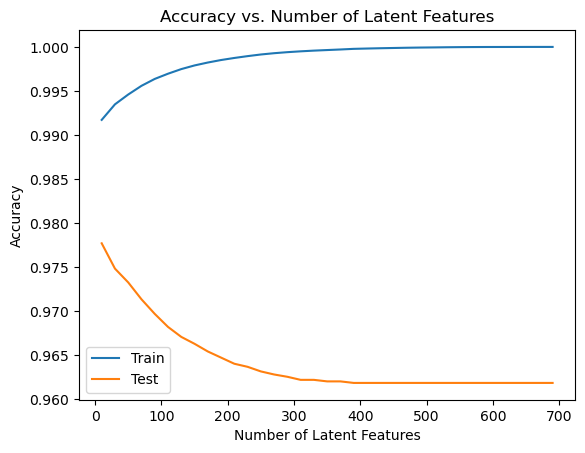

In [271]:
num_latent_feats = np.arange(10, 700+10, 20)
sum_errs_train = []
sum_errs_test = []

# Align u and vt matrices with the test set based on common users and articles
u_test = u_train[user_item_train.index.isin(test_idx), :]
vt_test = vt_train[:, user_item_train_col_index.isin(test_arts)]

# Extract common users and articles from both train and test sets
user_item_est = user_item_test.loc[list(set(user_item_train.index) & set(user_item_test.index)), :]

for k in num_latent_feats:
    # Restructure the matrices with k latent features
    s_new_train, u_new_train, vt_new_train = np.diag(s_train[:k]), u_train[:, :k], vt_train[:k, :]
    u_new_test, vt_new_test = u_test[:, :k], vt_test[:k, :]

    # Predict the user-item matrix for both train and test data
    user_item_est_train = np.around(np.dot(np.dot(u_new_train, s_new_train), vt_new_train))
    user_item_est_test = np.around(np.dot(np.dot(u_new_test, s_new_train), vt_new_test))

    # Calculate the differences (errors) between actual and predicted values
    diffs_train = np.subtract(user_item_train, user_item_est_train)
    diffs_test = np.subtract(user_item_est, user_item_est_test)

    # Total errors and keep track of them
    err_train = np.sum(np.sum(np.abs(diffs_train)))
    err_test = np.sum(np.sum(np.abs(diffs_test)))

    sum_errs_train.append(err_train)
    sum_errs_test.append(err_test)

# Plot the number of latent features vs. accuracy for both train and test sets
plt.plot(num_latent_feats, 1 - np.array(sum_errs_train) / (user_item_train.shape[0] * user_item_train.shape[1]), label='Train')
plt.plot(num_latent_feats, 1 - np.array(sum_errs_test) / (user_item_est.shape[0] * user_item_est.shape[1]), label='Test')

plt.xlabel('Number of Latent Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Latent Features')
plt.legend()
plt.show()

`6.` Use the cell below to comment on the results you found in the previous question. Given the circumstances of your results, discuss what you might do to determine if the recommendations you make with any of the above recommendation systems are an improvement to how users currently find articles? 

<a id='conclusions'></a>
### Extras
Using your workbook, you could now save your recommendations for each user, develop a class to make new predictions and update your results, and make a flask app to deploy your results.  These tasks are beyond what is required for this project.  However, from what you learned in the lessons, you certainly capable of taking these tasks on to improve upon your work here!


## Conclusion

> Congratulations!  You have reached the end of the Recommendations with IBM project! 

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2322/view). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations! 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Recommendations_with_IBM.ipynb'])